## Dataset

In [46]:
import pandas as pd

# Path to your CSV file
file_path = '/Users/antoinemunier/DEV/thesis/Data/uppsala_neuralnet.csv'
df_base = pd.read_csv(file_path)

In [47]:
df_base.describe()

,fuel_U238,fuel_Pu236,fuel_Pu238,fuel_Pu239,fuel_Pu240,fuel_Pu241,fuel_Pu242,fuel_Pu244,fuel_Am241,fuel_Cm242,fuel_Cm244,fuel_Cm246,fuel_Cm248,fuel_Cm250,fuel_Bk249,AN,SF,fuel_TOT_GS,fuel_TOT_DH,fuel_TOT_A
count,861000.000000,8.610000e+05,8.610000e+05,861000.000000,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,8.610000e+05,861000.000000,861000.000000,8.610000e+05,8.610000e+05,8.610000e+05
mean,1.923939,1.186909e-13,2.292578e-05,0.007542,5.763672e-04,1.811419e-04,1.073277e-05,4.562856e-11,6.451811e-05,3.293371e-07,9.219051e-08,3.916115e-11,5.404885e-15,2.651717e-23,2.061789e-21,430.205664,8.202050,2.565229e+18,2.816373e+05,2.851769e+18
std,0.067318,2.545854e-13,3.646225e-05,0.006864,6.933494e-04,2.611333e-04,2.037692e-05,1.283706e-10,1.119654e-04,1.001584e-06,2.617536e-07,1.521269e-10,2.637586e-14,1.513592e-22,1.702664e-20,957.054285,22.240783,4.937859e+18,4.750295e+05,4.782976e+18
min,1.793550,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.838400,0.024830,1.794450e+12,9.929460e+00,1.285680e+13
25%,1.866050,4.009592e-25,3.895350e-15,0.000002,2.299293e-11,1.373450e-15,7.837000e-21,8.331540e-32,4.252452e-17,1.474733e-26,8.357538e-32,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.632000,0.027240,1.843848e+15,5.020710e+02,6.031115e+15
50%,1.923310,6.257620e-15,3.473265e-06,0.006842,2.628690e-04,4.171065e-05,7.019485e-07,2.731250e-13,7.201235e-06,5.754330e-10,4.629000e-10,1.216500e-14,1.003905e-19,8.399820e-29,0.000000e+00,76.250000,0.458700,1.072380e+17,3.645105e+04,4.657805e+17
75%,1.980540,1.019752e-13,3.283223e-05,0.013901,1.023280e-03,2.897232e-04,1.237623e-05,2.325450e-11,8.615675e-05,6.929230e-08,4.595360e-08,6.677630e-12,3.079210e-16,6.218230e-25,4.550853e-24,403.400000,4.402000,1.718972e+18,3.621900e+05,3.455268e+18
max,2.049180,2.597810e-12,2.204570e-04,0.020921,3.103340e-03,1.483920e-03,1.445510e-04,1.351170e-09,9.020800e-04,1.063970e-05,3.041870e-06,2.144810e-09,4.504020e-13,2.944690e-21,5.872060e-19,9883.000000,246.800000,1.820540e+19,1.663620e+06,1.780210e+19


In [ ]:
# Delete column with less than 0.001 of density
columns_to_delete = ['fuel_Pu236', 'fuel_Bk249', 'fuel_Cm250', 'fuel_Cm248', 'fuel_Cm246', 'fuel_Cm244', 'fuel_Cm242', 'fuel_Pu244', 'fuel_Am241']

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create a copy of the dataframe to store normalized values
df_normalized = df_base.copy()

columns_to_normalize = df_base.columns

# Normalize each column
df_normalized[columns_to_normalize] = scaler.fit_transform(df_base[columns_to_normalize])

## Baseline models

### Linear Regression

R² scores for each isotope:
fuel_Pu239: 0.3227
fuel_Cm242: 0.2952
fuel_Pu236: 0.2611
fuel_Pu241: 0.2395
fuel_Pu240: 0.2237
fuel_Pu238: 0.1571
fuel_Pu242: 0.1064
fuel_Cm244: 0.0679
fuel_Pu244: 0.0531
fuel_Am241: 0.0447
fuel_Cm246: 0.0292
fuel_Bk249: 0.0262
fuel_Cm248: 0.0190
fuel_U238: 0.0158
fuel_Cm250: 0.0139


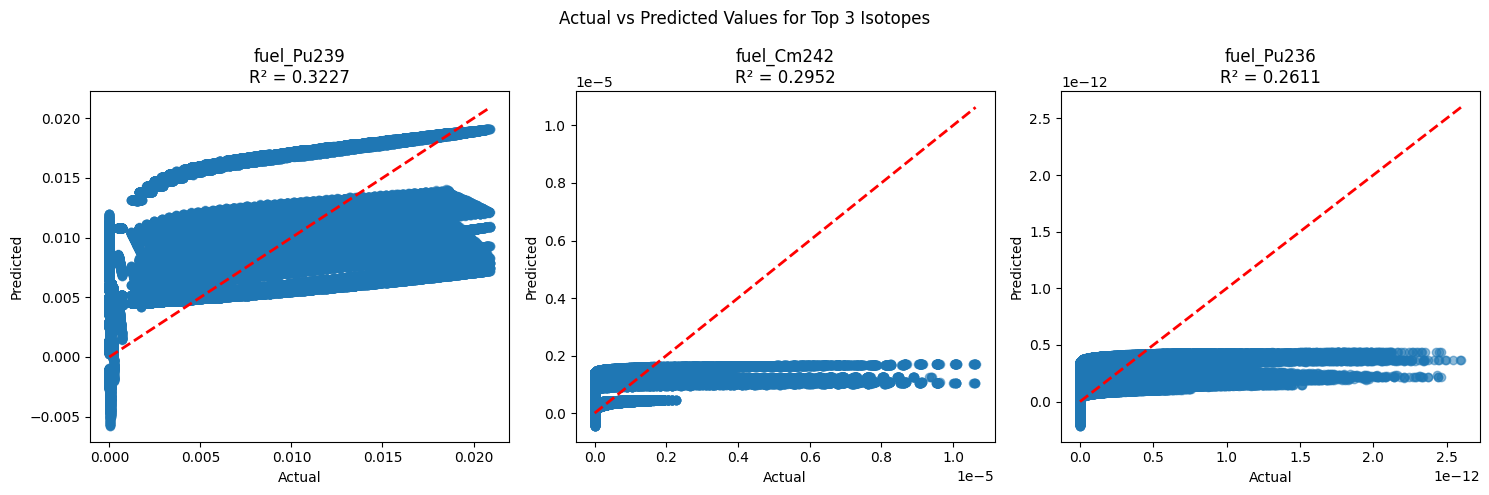


Feature importance for top 3 isotopes:

fuel_Pu239:
fuel_TOT_A: 0.000000
fuel_TOT_GS: -0.000000
fuel_TOT_DH: 0.000000
SF: -0.000000
AN: 0.000000

fuel_Cm242:
fuel_TOT_A: 0.000000
fuel_TOT_GS: -0.000000
fuel_TOT_DH: 0.000000
SF: -0.000000
AN: 0.000000

fuel_Pu236:
fuel_TOT_A: 0.000000
fuel_TOT_GS: -0.000000
fuel_TOT_DH: 0.000000
SF: -0.000000
AN: 0.000000


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define input (X) and output (y) features
input_features = ['AN', 'SF', 'fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']
output_features = [
    'fuel_U238', 'fuel_Pu236', 'fuel_Pu238', 'fuel_Pu239', 'fuel_Pu240',
    'fuel_Pu241', 'fuel_Pu242', 'fuel_Pu244', 'fuel_Am241', 'fuel_Cm242',
    'fuel_Cm244', 'fuel_Cm246', 'fuel_Cm248', 'fuel_Cm250', 'fuel_Bk249'
]

# Prepare the data
X = df_base[input_features]
y = df_base[output_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² scores for each isotope
r2_scores = {}
for i, isotope in enumerate(output_features):
    r2 = r2_score(y_test[isotope], y_pred[:, i])
    r2_scores[isotope] = r2

# Sort isotopes by R² score
sorted_isotopes = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("R² scores for each isotope:")
for isotope, score in sorted_isotopes:
    print(f"{isotope}: {score:.4f}")

# Plot actual vs predicted for the top 3 best-predicted isotopes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Actual vs Predicted Values for Top 3 Isotopes')

for i, (isotope, score) in enumerate(sorted_isotopes[:3]):
    ax = axes[i]
    idx = output_features.index(isotope)
    
    # Plot actual vs predicted
    ax.scatter(y_test[isotope], y_pred[:, idx], alpha=0.5)
    ax.plot([y_test[isotope].min(), y_test[isotope].max()], 
            [y_test[isotope].min(), y_test[isotope].max()], 
            'r--', lw=2)
    
    ax.set_title(f'{isotope}\nR² = {score:.4f}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Print feature importance for the top 3 isotopes
print("\nFeature importance for top 3 isotopes:")
for isotope, score in sorted_isotopes[:3]:
    idx = output_features.index(isotope)
    importance = dict(zip(input_features, model.coef_[idx]))
    print(f"\n{isotope}:")
    for feature, coef in sorted(importance.items(), key=lambda x: abs(x[1]), reverse=True):
        print(f"{feature}: {coef:.6f}")

### XGBoost

In [37]:
!brew install libomp

python(90938) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:d9faa506c014dedc0b034a68103ba75c9a58242f4d6c67b6ca0f649c39602bcf
######################################################################### 100.0%% 39.0% 72.1%
==> Pouring portable-ruby-3.3.7.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
acme.sh                    humanlog                   reveal-md
acronym                    hypopg                     rink
ad                         icann-rdap                 rmtrash
alive2                     json2hcl                   ruby@3.3
aqtinstall                 jwt-cli                    runitor
asciigen                   kool                       s5cmd
astroterm                  kube-bench  

R² scores for each isotope:
fuel_Pu239: 0.9995
fuel_Pu240: 0.9993
fuel_Pu241: 0.9975
fuel_Am241: 0.9955
fuel_Pu238: 0.9752
fuel_Pu242: 0.9576
fuel_U238: 0.8886
fuel_Cm250: -0.0000
fuel_Cm248: -0.0000
fuel_Cm246: -0.0000
fuel_Bk249: -0.0000
fuel_Cm244: -0.0000
fuel_Pu244: -0.0000
fuel_Cm242: -0.0000
fuel_Pu236: -0.0000


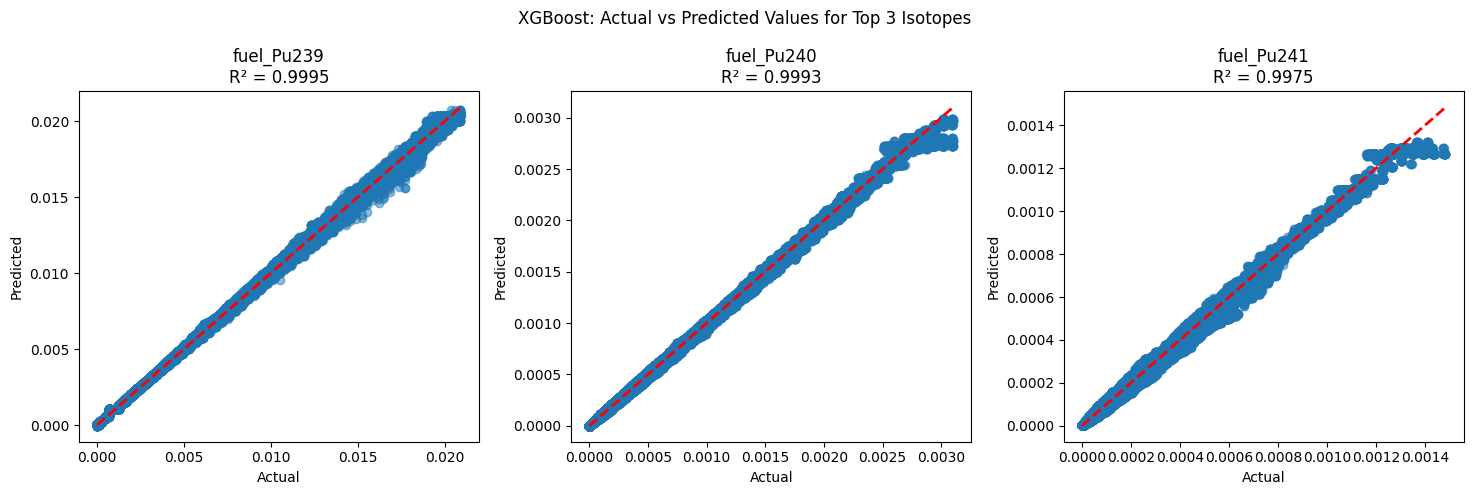


Feature importance for top 3 isotopes:

fuel_Pu239:
AN: 0.880694
SF: 0.080156
fuel_TOT_GS: 0.018153
fuel_TOT_DH: 0.016144
fuel_TOT_A: 0.004854

fuel_Pu240:
AN: 0.725697
SF: 0.101645
fuel_TOT_DH: 0.099625
fuel_TOT_GS: 0.052762
fuel_TOT_A: 0.020271

fuel_Pu241:
AN: 0.749921
SF: 0.136672
fuel_TOT_GS: 0.050141
fuel_TOT_DH: 0.047156
fuel_TOT_A: 0.016110


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Define input (X) and output (y) features (same as in your Linear Regression)
input_features = ['AN', 'SF', 'fuel_TOT_GS', 'fuel_TOT_DH', 'fuel_TOT_A']
output_features = [
    'fuel_U238', 'fuel_Pu236', 'fuel_Pu238', 'fuel_Pu239', 'fuel_Pu240',
    'fuel_Pu241', 'fuel_Pu242', 'fuel_Pu244', 'fuel_Am241', 'fuel_Cm242',
    'fuel_Cm244', 'fuel_Cm246', 'fuel_Cm248', 'fuel_Cm250', 'fuel_Bk249'
]

# Prepare the data
X = df_base[input_features]
y = df_base[output_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionary to store models
models = {}
r2_scores = {}

# Train separate XGBoost model for each isotope
for isotope in output_features:
    # Initialize XGBoost model with parameters
    model = xgb.XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    # Train model
    model.fit(
        X_train, 
        y_train[isotope],
        eval_set=[(X_test, y_test[isotope])],
        verbose=False
    )
    
    # Store model
    models[isotope] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R² score
    r2 = r2_score(y_test[isotope], y_pred)
    r2_scores[isotope] = r2

# Sort isotopes by R² score
sorted_isotopes = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Print results
print("R² scores for each isotope:")
for isotope, score in sorted_isotopes:
    print(f"{isotope}: {score:.4f}")

# Plot actual vs predicted for the top 3 best-predicted isotopes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('XGBoost: Actual vs Predicted Values for Top 3 Isotopes')

for i, (isotope, score) in enumerate(sorted_isotopes[:3]):
    ax = axes[i]
    model = models[isotope]
    y_pred = model.predict(X_test)
    
    # Plot actual vs predicted
    ax.scatter(y_test[isotope], y_pred, alpha=0.5)
    ax.plot([y_test[isotope].min(), y_test[isotope].max()], 
            [y_test[isotope].min(), y_test[isotope].max()], 
            'r--', lw=2)
    
    ax.set_title(f'{isotope}\nR² = {score:.4f}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Print feature importance for the top 3 isotopes
print("\nFeature importance for top 3 isotopes:")
for isotope, score in sorted_isotopes[:3]:
    model = models[isotope]
    importance = dict(zip(input_features, model.feature_importances_))
    print(f"\n{isotope}:")
    for feature, imp in sorted(importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {imp:.6f}")

In [41]:
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# Add these lines after calculating R² scores but before sorting
rmse_scores = {}
accuracy_scores = {}

for isotope in output_features:
    model = models[isotope]
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test[isotope], y_pred))
    rmse_scores[isotope] = rmse
    
    # Calculate accuracy (with a tolerance of 1% of the mean value)
    tolerance = np.mean(y_test[isotope]) * 0.01
    accuracy = np.mean(np.abs(y_test[isotope] - y_pred) <= tolerance)
    accuracy_scores[isotope] = accuracy

# Print all metrics
print("\nMetrics for each isotope:")
print("-" * 50)
print(f"{'Isotope':<12} {'R²':>10} {'RMSE':>12} {'Accuracy':>10}")
print("-" * 50)
for isotope in output_features:
    print(f"{isotope:<12} {r2_scores[isotope]:>10.4f} {rmse_scores[isotope]:>12.4e} {accuracy_scores[isotope]:>10.2%}")


Metrics for each isotope:
--------------------------------------------------
Isotope              R²         RMSE   Accuracy
--------------------------------------------------
fuel_U238        0.8886   2.2450e-02     73.36%
fuel_Pu236      -0.0000   2.5552e-13      0.23%
fuel_Pu238       0.9752   5.7511e-06      3.99%
fuel_Pu239       0.9995   1.5013e-04     63.66%
fuel_Pu240       0.9993   1.8336e-05     56.82%
fuel_Pu241       0.9975   1.2978e-05     50.29%
fuel_Pu242       0.9576   4.2034e-06      2.10%
fuel_Pu244      -0.0000   1.2841e-10      0.16%
fuel_Am241       0.9955   7.5101e-06      5.51%
fuel_Cm242      -0.0000   1.0084e-06      0.14%
fuel_Cm244      -0.0000   2.6184e-07      0.21%
fuel_Cm246      -0.0000   1.5208e-10      0.18%
fuel_Cm248      -0.0000   2.6363e-14      0.07%
fuel_Cm250      -0.0000   1.5128e-22      0.10%
fuel_Bk249      -0.0000   1.6638e-20      0.06%
